# Creando tu propio DataSet desde Google Imagenes
*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*m

en este turotial veremos como facilmente crear un dataset de imagenes de  Google. 
**Nota**: Puedes repetir estos pasos para cualquier categoria que quieras clasificar 

In [0]:
from fastai.vision import *

## Obtener una lista de URLs

### Busca y Navega

Ir a [Google Images](http://images.google.com) y busca las imagenes en las cuales estas interesado. se específico en la busqueda de Google, obtendras mejores resultados y menos trabajo manual tienes que hacer.

Selecciona todas las imagenes que quieras bajar, o hasta ver un boton que dice 'mostrar mas resultados'. Todas las imagenes seleccionadas estan disponibles para bajar. Para obtener mas, click en el boton, y continua seleccionando. El número máximo de imagenes que Google muestra es 700.

Es una buena idea poner cosas que quieras excluir, Por ejemplo: si estas interesado en  Eurasian wolf, "canis lupus lupus", seria una buena idea excluir otros variantes:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

tambien puedes limitar tus resultados para mostrar sol fotos haciendo click en Herramientas y seleccionando Imagenes.

### Bajar a un archivo

Ahora debes ejecutar un codigo Javascript en tu explorador el cual grabara todas las URLs de todas las imagenes que quieres en tu dataset.

presiona <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> en Windows/Linux y <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> en Mac, y una pequeña consola javascript aparecera. aca es donde puedes pegar tus comandos Javascript.

Necesitas las urls de lada una de las imagenes. Antes de ejecutar el siguiente comando, podrias querer deshabilitar y bloquear alguna extenciones (uBlock, AdBlockPlus etc.) en Chrome. de otra manera el comando window.open() no funcionara . Ahora basta ejecutar el siguiente comando:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

### Crea un directorio y sube las URL

Elige un nombre apropiado para tus imagenes etiquetadas. Puedes ejecutar esto multiples veces y crear etiquetas.

Los comandos siguientes deben ser ejecutados para cada categoria.

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#folder = 'grizzly'
#file = 'urls_grizzly.csv'

In [0]:
path = Path('/content/drive/My Drive/Datasets/data/bears')
#dest = path/folder
#dest.mkdir(parents=True, exist_ok=True)

In [16]:
path.ls()

[PosixPath('/content/drive/My Drive/Datasets/data/bears/teddys'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/black'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/grizzly'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/urls_black.csv'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/urls_grizzly.csv'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/urls_teddys.csv'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/models'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/cleaned.csv'),
 PosixPath('/content/drive/My Drive/Datasets/data/bears/export.pkl')]

In [0]:
folder = 'grizzly'
file = 'urls_grizzly.csv'
path = Path('/content/drive/My Drive/Datasets/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'teddys'
file = 'urls_teddys.csv'
path = Path('/content/drive/My Drive/Datasets/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'black'
file = 'urls_black.csv'
path = Path('/content/drive/My Drive/Datasets/data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
download_images(path/file, dest, max_pics=200)

Finalmente, Solo necesitas presionar  'Upload' en tu directorio de trabajo y seleccionar tu archivo, Click en 'Upload' para cada uno de los archivos.

![imagen](images/download_images/upload.png)

## Bajar las imagenes

Ahora bajaran las imagenes de sus respectivas urls.

fast.ai tiene una funcion que permite que tu hagas esto. Solo debes especificar las urls tambien como la ruta destino y esta buncion bajará y guardara todas las imagenes que puedan ser abiertas. Si ellas tienen algún problema de apeertura, ellas no serán grabadas.

Bajemos tus imagenes! Nota que puedes elegir un máximo de imagenes a bajar. En este caso no bajaremos todas las urls.

Debes ejecutar esta linea para cada categoría.

In [0]:
classes = ['teddys','grizzly','black']

In [0]:
#download_images(path/file, dest, max_pics=200)

NameError: ignored

Ahora podemos remover las imagenes que no pueden ser abiertas:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## Revisemos la data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)



# If you already cleaned your data, run this cell instead of the one before

#np.random.seed(42)

#data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['black', 'grizzly', 'teddys']

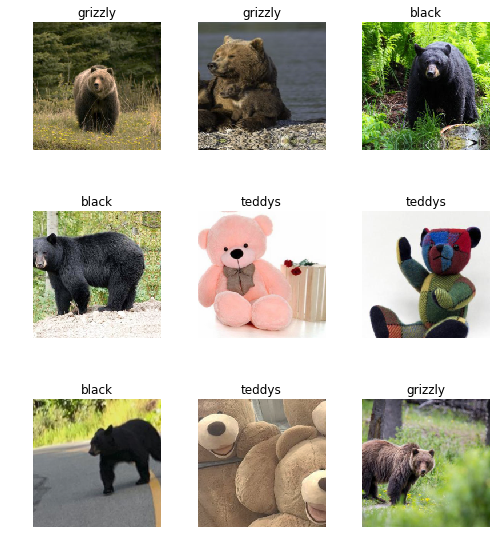

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 224, 56)

## Entrenemos el modelo

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.208997,0.454682,0.196429,00:04
1,0.759241,0.192881,0.035714,00:04
2,0.549087,0.174032,0.017857,00:04
3,0.442170,0.171838,0.035714,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


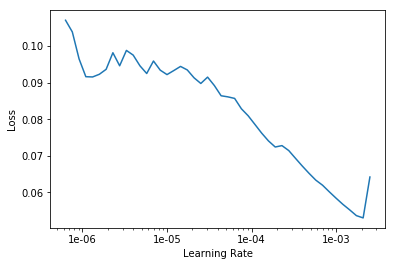

In [23]:
# Si el grafico no esta mostrando resultados definamos start|end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.089139,0.184493,0.035714,00:04
1,0.076070,0.205798,0.053571,00:04


In [0]:
learn.save('stage-2')

## Interpretación

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

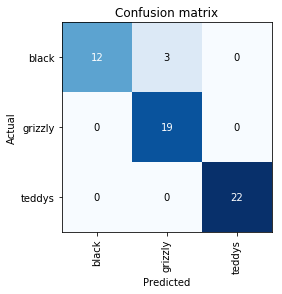

In [28]:
interp.plot_confusion_matrix()

## Limpieza

Los errores No se deben a mala calidad de nuestro modelo. Hay imagenes que no deberian estar.

Utilizando `ImageCleaner` widget desde `fastai.widgets` Podemos eliminar, Remover fotos ue no pertenecen a las categorias.

In [0]:
from fastai.widgets import *

Primero necesitamos ubicar estas imagness. Utilicemos `.from_toplosses`. Entonces podemos indexar las "malas imagenes" a la función  `ImageCleaner`.

las imagenes no serán borradas directamente del disco, secreara un nuevo archivo csv  `cleaned.csv` de donde se creara un nuevo grupo de imagenes etiquetadas de forma correcta y seguir entrenando el modelo.

Para limpiar un set completo de imagenes, Necesitamos crear un nuevo set de datos Sin la división. 

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# Si la data ya esta limpia utilizando `from_toplosses`,
# Ejecuta esta celda en vez de la anterior y procede a la eliminación de duplicados.
# Todos los resultados del paso anteriroo pueden ser sobreescritos
# con ek nuevo `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Creemos un nuevo modelo utilizando el nuevo databunch con todas las imagenes.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Asegurate que estes ejecutando esto en Jupyter Notebook, no Jupyter Lab. Accesible via [/tree](/tree), no [/lab](/lab). Ejecutar `ImageCleaner` en Jupyter Lab no esta soportado [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
# No ejecutar en google colab o otra instancia de jupyter lab.
# Si ejecutas en Jupyter Lab, necesitas reiniciar tu instancia
# Todas laas variables se perderan.
ImageCleaner(ds, idxs, path)

NameError: ignored

Si el codigo anterior no muestra GUI(Conteniendo imagenes y botones), revisar las configuraciones "ipywidgets". Trata la solución en el siguiente link.

Etiqueta fotos para borrar presionando 'Delete'. Luego pincha 'Next Batch' para borrar las etiquetadas y mantener el resto. ImageCleaner mostrara una nueva fila de imagenes. En este caso, El widget mostrara imagenes hasta que no hayan mas en top_losses.ImageCleaner(ds, idxs)

YPuedes encontrar duplicadas y eliminarlas! Para hacer esto, necesitas ejecutar .from_similars para obtener potenciales duplicados ids y ejecuta ImageCleaner con duplicates=True. la API funciona igual que con imagenes mal clasificadas: solo selecciona las que quieres eliminar.

Asegurate de crear el databunch y learn_cln desde el archivo cleaned.csv. de otra forma el archivo podría ser sobreesrito desde cero, perdiendo todos los resultados obtenidos.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
learn.export()

Recuerda recrear ImageDataBunch desde `cleaned.csv` Para incluir los cambios en la Data

## Poniendo el modelo en producción

Primero, Exportemos el contenido del objeto `Learner` en producción:

In [0]:
defaults.device = torch.device('cpu')

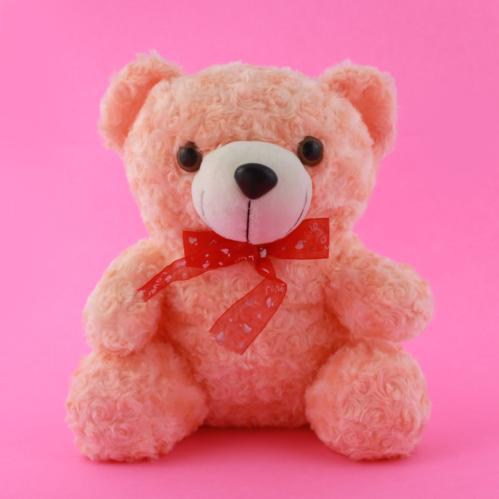

In [0]:
img = open_image(path/'teddys'/'00000084.jpg')
img

Ahora creemos nuestro `Learner` en un ambiente productivo, solo asegurar que el  `path` contiene el archivo 'export.pkl'.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category teddys

hora podemos crear una ruta como esta ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(Este ejemplo es para [Starlette](https://www.starlette.io/) web app toolkit.)

## Posibles Errores
- La mayoria de las veces las cosas se entrenaran bien con defaults
- no hay mucho que "Tunear"
- La mayoria es
  - Learning rate
  - Number of epochs

### Learning rate (LR) Demasiado alta

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) demasiado baja

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [0]:
learn.recorder.plot_losses()

Esto toma mucho tiempo, Esta tomando mucho tiempo en cada imagen, Puede ser Sobreentrenamiento.

### Pocos epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

### Muchos epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))